# ================ Customer Segmentation =================

# Part 1: EDA

In [1]:
# Import required libraries

# common libraries used for EDA (Exploratory Data Analysis)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and scaling tools
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

#check multicollinearity (advanced)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load dataset
df = pd.read_excel("marketing_campaign.xlsx", sheet_name="marketing_campaign")

In [3]:
# Display the first few rows
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
# Get summary statistics
# This shows count, mean, min, max, etc. for numeric columns
df.describe()


,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274


In [5]:
# Check shape (rows & columns)
print("Shape of dataset (rows, columns):", df.shape)


Shape of dataset (rows, columns): (2240, 29)


In [6]:
# Check column names
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [7]:
#  Check basic info (data types, nulls)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [8]:
# Check for missing values
print(df.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [9]:
# Percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)


ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64


In [10]:
# Handle missing values

# The only missing column is 'Income'. fill it with the median.
df['Income'].fillna(df['Income'].median(), inplace=True)
print("Missing values handled (Income filled with median)")


Missing values handled (Income filled with median)


In [11]:
# Check for duplicates
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


In [12]:
# Remove duplicates if any
df.drop_duplicates(inplace=True)
print("After removing duplicates:", df.shape)

After removing duplicates: (2240, 29)


In [13]:
# Feature Engineering

# Create a new column 'Age' from 'Year_Birth'
df['Age'] = 2025 - df['Year_Birth']

# Create 'TotalChildren' = Kidhome + Teenhome
df['TotalChildren'] = df['Kidhome'] + df['Teenhome']

# Create 'TotalSpend' = total money spent across all product categories
df['TotalSpend'] = (df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + 
                    df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds'])

# Create 'FamilySize' (1 for customer + kids + partner)
df['IsPartner'] = df['Marital_Status'].apply(lambda x: 1 if x in ['Married','Together'] else 0)
df['FamilySize'] = df['TotalChildren'] + 1 + df['IsPartner']

In [14]:
print("Feature Engineering done successfully!")
df[['Age', 'TotalChildren', 'TotalSpend', 'FamilySize']].head()

Feature Engineering done successfully!


,Age,TotalChildren,TotalSpend,FamilySize
0,68,0,1617,1
1,71,2,27,3
2,60,0,776,2
3,41,1,53,3
4,44,1,422,3


<Figure size 1400x1000 with 0 Axes>

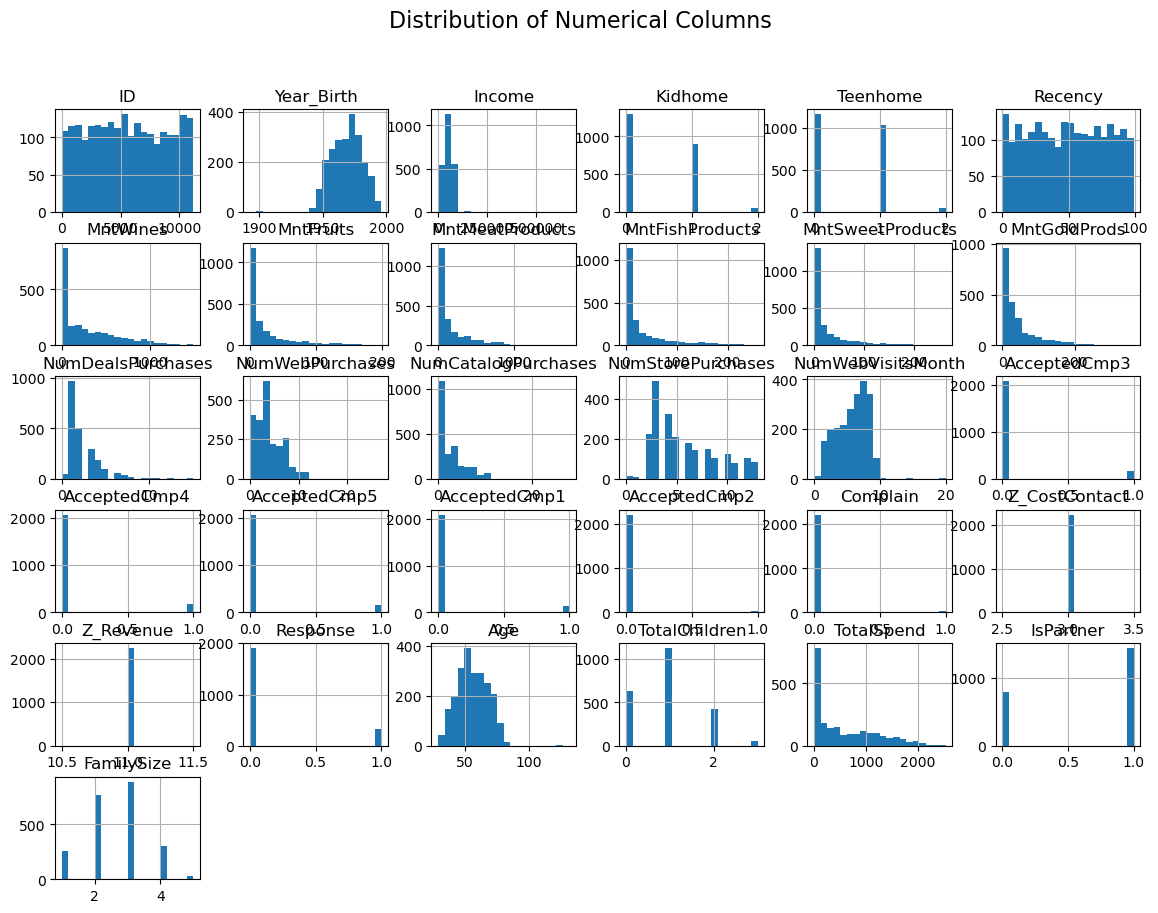

In [15]:
# Univariate Analysis (Single variable)

# Plot histograms for numerical columns
num_cols = df.select_dtypes(include=['int64','float64']).columns

plt.figure(figsize=(14,10))
df[num_cols].hist(bins=20, figsize=(14,10))
plt.suptitle("Distribution of Numerical Columns", fontsize=16)
plt.show()


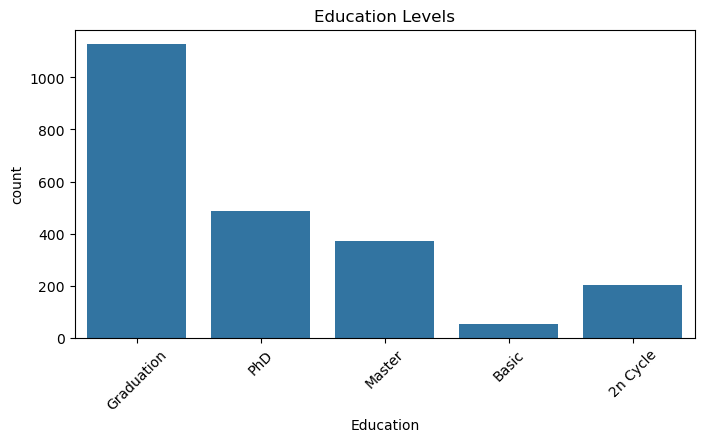

In [16]:
# Categorical Data Visualization

# counts for Education
plt.figure(figsize=(8,4))
sns.countplot(x='Education', data=df)
plt.title("Education Levels")
plt.xticks(rotation=45)
plt.show()

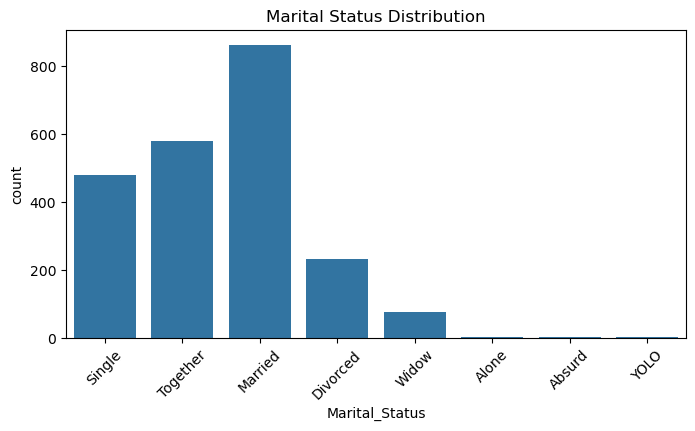

In [17]:
#counts for Marital Status
plt.figure(figsize=(8,4))
sns.countplot(x='Marital_Status', data=df)
plt.title("Marital Status Distribution")
plt.xticks(rotation=45)
plt.show()


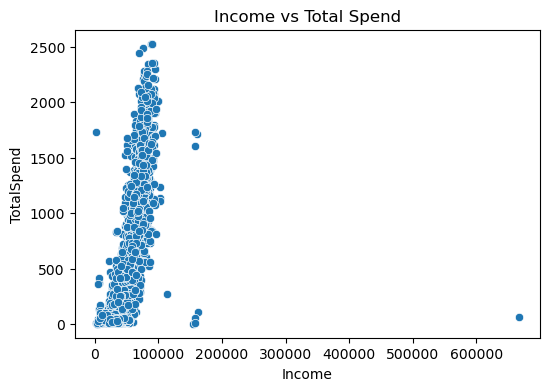

In [18]:
# Bivariate Analysis (Relationships)

# Income vs TotalSpend
plt.figure(figsize=(6,4))
sns.scatterplot(x='Income', y='TotalSpend', data=df)
plt.title("Income vs Total Spend")
plt.show()

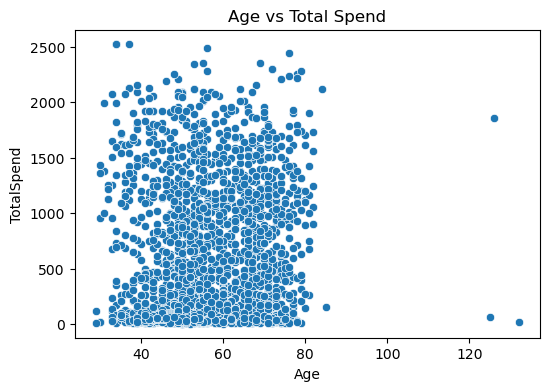

In [19]:
#  Age vs TotalSpend
plt.figure(figsize=(6,4))
sns.scatterplot(x='Age', y='TotalSpend', data=df)
plt.title("Age vs Total Spend")
plt.show()


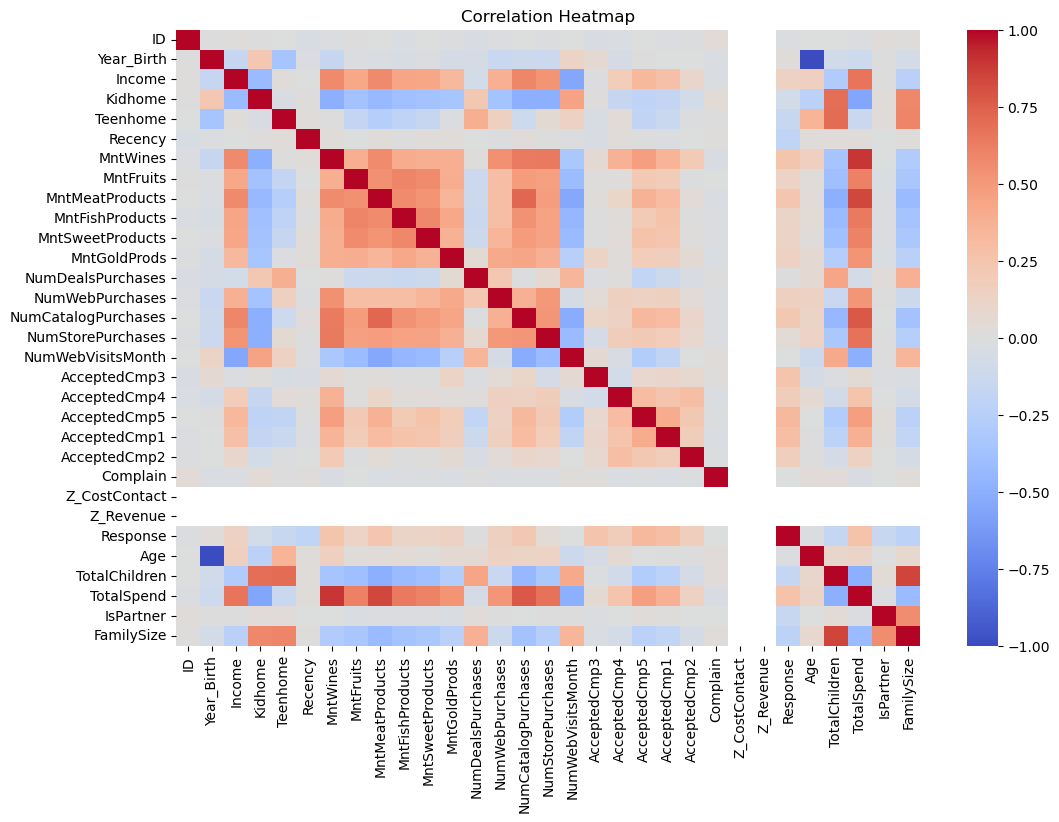

In [20]:
# Correlation Matrix
# Correlation heatmap for numeric columns
numeric_data = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12,8))
sns.heatmap(numeric_data.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

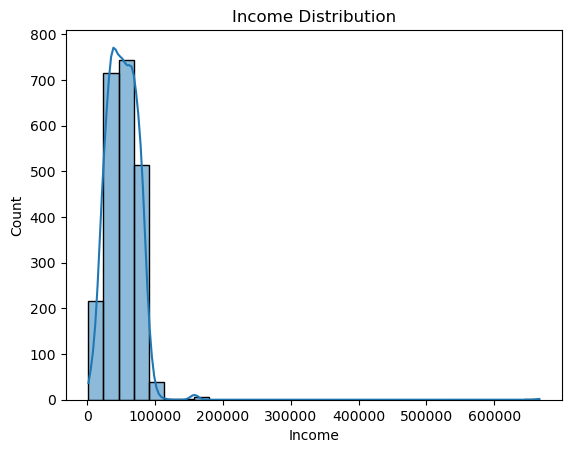

In [21]:
# Histogram for Income
sns.histplot(df['Income'], bins=30, kde=True)
plt.title("Income Distribution")
plt.show()

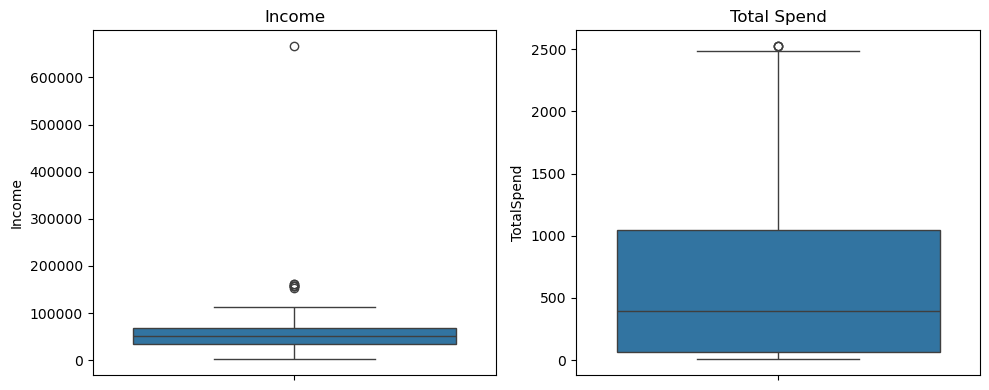

In [22]:
# Outlier Detection (Boxplots)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(y='Income', data=df)
plt.title("Income")

plt.subplot(1,2,2)
sns.boxplot(y='TotalSpend', data=df)
plt.title("Total Spend")

plt.tight_layout()
plt.show()


In [23]:
# Handling outliers Using IQR Method
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Cap outliers
df['Income'] = df['Income'].apply(lambda x: upper if x > upper else (lower if x < lower else x))
print(" Min >= lower bound:", df['Income'].min() >= lower)
print(" Max <= upper bound:", df['Income'].max() <= upper)


 Min >= lower bound: True
 Max <= upper bound: True


In [24]:
corr_matrix = numeric_data.corr()
corr_target = corr_matrix['Response'].sort_values(ascending=False)
print(corr_target)


Response               1.000000
AcceptedCmp5           0.326634
AcceptedCmp1           0.293982
TotalSpend             0.265298
AcceptedCmp3           0.254258
MntWines               0.247254
MntMeatProducts        0.236335
NumCatalogPurchases    0.220810
AcceptedCmp4           0.177019
AcceptedCmp2           0.169293
NumWebPurchases        0.148730
MntGoldProds           0.139850
Income                 0.132867
MntFruits              0.125289
MntSweetProducts       0.117372
MntFishProducts        0.111331
NumStorePurchases      0.039363
Year_Birth             0.021325
NumDealsPurchases      0.002238
Complain              -0.001707
NumWebVisitsMonth     -0.003987
Age                   -0.021325
ID                    -0.021968
Kidhome               -0.080008
IsPartner             -0.150075
Teenhome              -0.154446
TotalChildren         -0.169163
Recency               -0.198437
FamilySize            -0.219440
Z_CostContact               NaN
Z_Revenue                   NaN
Name: Re

In [25]:
threshold = 0.05  #  threshold
important_features = corr_target[abs(corr_target) > threshold].index
print("Important Features:")
print(important_features)


Important Features:
Index(['Response', 'AcceptedCmp5', 'AcceptedCmp1', 'TotalSpend',
       'AcceptedCmp3', 'MntWines', 'MntMeatProducts', 'NumCatalogPurchases',
       'AcceptedCmp4', 'AcceptedCmp2', 'NumWebPurchases', 'MntGoldProds',
       'Income', 'MntFruits', 'MntSweetProducts', 'MntFishProducts', 'Kidhome',
       'IsPartner', 'Teenhome', 'TotalChildren', 'Recency', 'FamilySize'],
      dtype='object')


In [26]:
# Drop least correlated features
least_important_features = corr_target[abs(corr_target) <= threshold].index
print("Least Important Features to Drop:")
print(least_important_features)

# Drop them from your dataset
df_reduced = df.drop(columns=least_important_features)

Least Important Features to Drop:
Index(['NumStorePurchases', 'Year_Birth', 'NumDealsPurchases', 'Complain',
       'NumWebVisitsMonth', 'Age', 'ID'],
      dtype='object')


In [27]:
print("Original shape:", df.shape)
print("After dropping less important features:", df_reduced.shape)


Original shape: (2240, 34)
After dropping less important features: (2240, 27)


In [28]:
# Data Scaling (for Clustering prep)

# Select numerical columns useful for clustering
features = ['Income','Age','TotalChildren','FamilySize','TotalSpend','Recency']

X = df[features]

# Standardize the data (mean=0, std=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data scaling done! Ready for clustering.")

Data scaling done! Ready for clustering.


In [29]:
#Encoding
from sklearn.preprocessing import LabelEncoder

label_cols = ['Education', 'Marital_Status']
encoder = LabelEncoder()

for col in label_cols:
    df[col] = encoder.fit_transform(df[col])

df[label_cols].head()


,Education,Marital_Status
0,2,4
1,2,4
2,2,5
3,2,5
4,4,3


In [30]:
from sklearn.decomposition import PCA

# Select numeric features 
numeric_df = df.select_dtypes(include=['int64', 'float64']).drop(columns=['Response'], errors='ignore')

# Standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Convert scaled data back to DataFrame for clearer column handling
scaled_df = pd.DataFrame(scaled_data, columns=numeric_df.columns)

In [31]:
# Apply PCA to retain 95% of the variance
pca = PCA(n_components=0.95)  # retain 95% of the variance


pca_data = pca.fit_transform(scaled_data)

print("Original shape:", scaled_data.shape)
print("Reduced shape after PCA:", pca_data.shape)

Original shape: (2240, 32)
Reduced shape after PCA: (2240, 21)


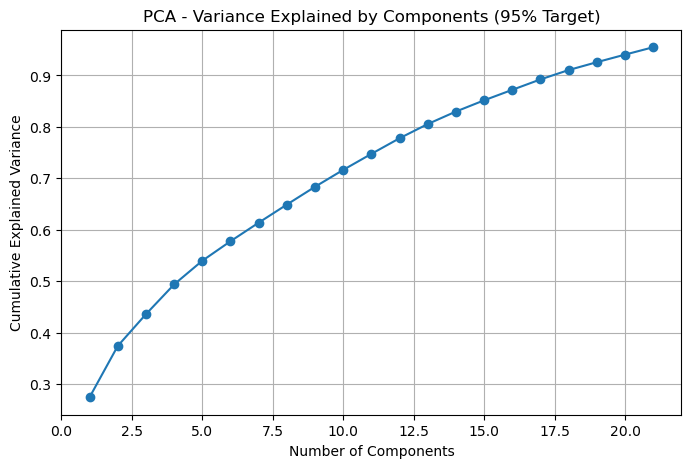

In [32]:
explained_variance = pca.explained_variance_ratio_

# Plotting explained variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Variance Explained by Components (95% Target)')
plt.grid(True)
plt.show()

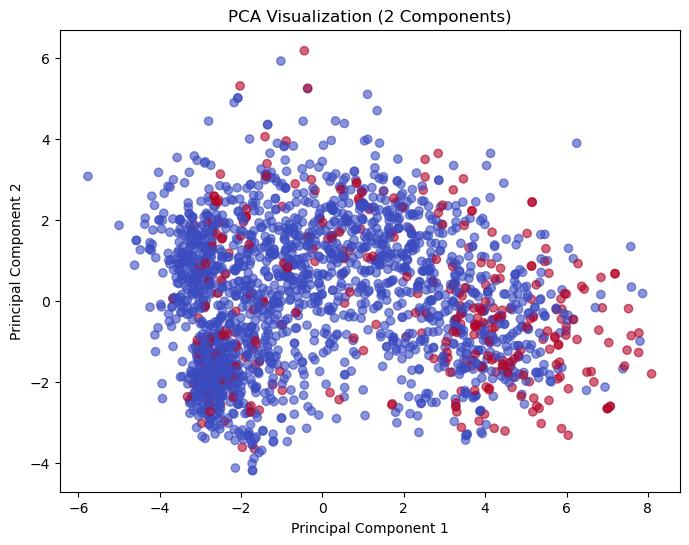

In [33]:
#  PCA to 2 components for visualization 
pca_2 = PCA(n_components=2)
pca_result = pca_2.fit_transform(scaled_data)

# Plotting 2 components
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:,0], pca_result[:,1], c=df['Response'].values, cmap='coolwarm', alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization (2 Components)')
plt.show()


In [34]:
#  Analyze Components
pca_components = pd.DataFrame(
    pca.components_, 
    columns=numeric_df.columns
)
# Rename the index to reflect component number
pca_components.index = [f'PC{i+1}' for i in range(pca.n_components_)]

In [35]:
print("\nPrincipal Component Loadings (95% variance model):")
print(pca_components.head())


Principal Component Loadings (95% variance model):
           ID  Year_Birth  Education  Marital_Status    Income   Kidhome  \
PC1 -0.005093   -0.046501   0.015511        0.007650  0.291870 -0.241208   
PC2 -0.009722   -0.391424   0.163149        0.029086  0.138192 -0.020270   
PC3 -0.041146    0.466940  -0.094257       -0.053151  0.023839  0.242034   
PC4 -0.025074   -0.071290   0.213363        0.006299  0.005810 -0.032956   
PC5  0.111815   -0.045149  -0.052058        0.257556  0.104909  0.123722   

     Teenhome   Recency  MntWines  MntFruits  ...  AcceptedCmp1  AcceptedCmp2  \
PC1 -0.080026  0.003735  0.271462   0.235064  ...      0.145682      0.048536   
PC2  0.459907  0.018392  0.160552  -0.046424  ...     -0.025055      0.023680   
PC3  0.043712 -0.010279  0.152401   0.028888  ...      0.157186      0.135888   
PC4 -0.073688 -0.011710  0.185713  -0.252963  ...      0.285854      0.422508   
PC5 -0.046251  0.042882 -0.088893   0.067319  ...      0.129861     -0.019936   

    

# Part 2: Model Building

##  --------- K-Means Clustering -------------

In [36]:
from sklearn.cluster import KMeans , AgglomerativeClustering ,MiniBatchKMeans,DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [37]:
# K-Means Clustering

# Try multiple K values (number of clusters)
inertia = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

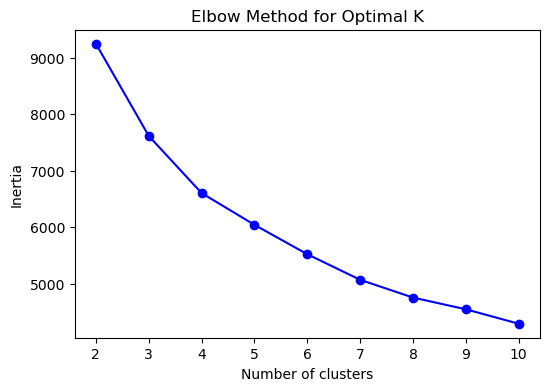

In [38]:
plt.figure(figsize=(6,4))
plt.plot(K, inertia, 'bo-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [39]:
# Choose K=4 for example
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
df['KMeans_Cluster'] = kmeans_labels

In [40]:
# Apply Final KMeans Model

# pick the K with best silhouette 
best_k = 4
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

print("KMeans applied successfully!")
print("Cluster counts:\n", df['Cluster'].value_counts())


KMeans applied successfully!
Cluster counts:
 Cluster
0    680
1    597
3    506
2    457
Name: count, dtype: int64


In [41]:
# Visualize Clusters 
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)

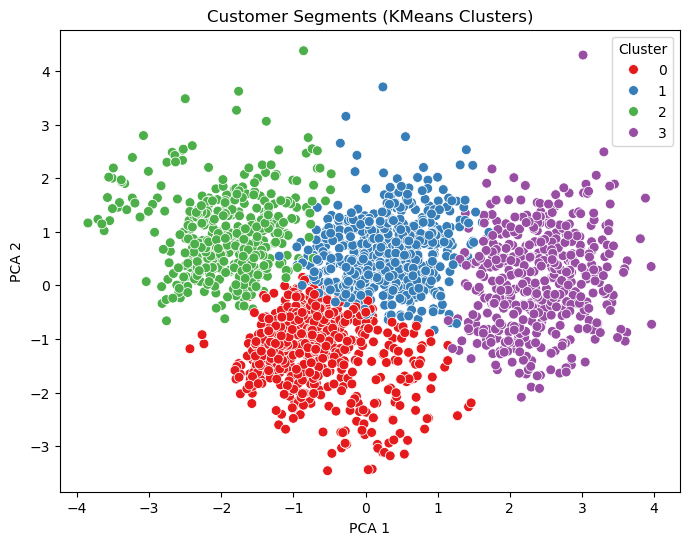

In [42]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1], hue=df['Cluster'], palette='Set1', s=50)
plt.title("Customer Segments (KMeans Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title='Cluster')
plt.show()


In [43]:
# Cluster Profiling

# Mean values of each cluster
cluster_profile = df.groupby('Cluster')[features].mean()
print("Cluster Profiles:\n")
display(cluster_profile)


Cluster Profiles:



,Income,Age,TotalChildren,FamilySize,TotalSpend,Recency
Cluster,,,,,,
0,31109.694118,48.104412,0.810294,2.454412,132.179412,47.725000
1,60411.553601,62.207705,0.974874,2.654941,748.504188,49.107203
2,44099.228118,59.656455,2.115974,3.794311,223.024070,50.083151
3,76691.545949,56.843874,0.057312,1.630435,1419.618577,50.092885


In [44]:
# Cluster Summary  (for KMeans)

# Select numeric columns only
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Group by KMeans cluster and compute mean
cluster_summary = df.groupby('KMeans_Cluster')[num_cols].mean()

print("Cluster Summary (KMeans):")
display(cluster_summary)

Cluster Summary (KMeans):


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,TotalChildren,TotalSpend,IsPartner,FamilySize
KMeans_Cluster,,,,,,,,,,,,,,,,,,,,,
0,5623.273121,1976.973988,2.128613,3.703757,31637.182081,0.676301,0.147399,48.479769,49.585260,8.434971,...,0.000000,0.008671,3.0,11.0,0.109827,48.026012,0.823699,136.328035,0.644509,2.468208
1,5687.096774,1969.112903,2.423387,3.794355,77044.671875,0.018145,0.050403,51.110887,652.298387,63.977823,...,0.040323,0.004032,3.0,11.0,0.320565,55.887097,0.068548,1431.792339,0.572581,1.641129
2,5553.975983,1965.301310,2.521834,3.722707,44281.745087,1.045852,1.069869,50.124454,131.969432,6.735808,...,0.004367,0.013100,3.0,11.0,0.104803,59.698690,2.115721,226.072052,0.679039,3.794760
3,5506.080808,1961.735690,2.579125,3.712121,60254.936869,0.065657,0.870370,47.388889,441.954545,30.744108,...,0.013468,0.011785,3.0,11.0,0.085859,63.264310,0.936027,755.789562,0.678451,2.614478


## ----------- Agglomerative (Hierarchical) Clustering -----------

In [45]:
#  Agglomerative (Hierarchical) Clustering

# Perform clustering
agg = AgglomerativeClustering(n_clusters=4, linkage='ward')
agg_labels = agg.fit_predict(X_scaled)

In [46]:
# Add labels to dataframe
df['Agglo_Cluster'] = agg_labels

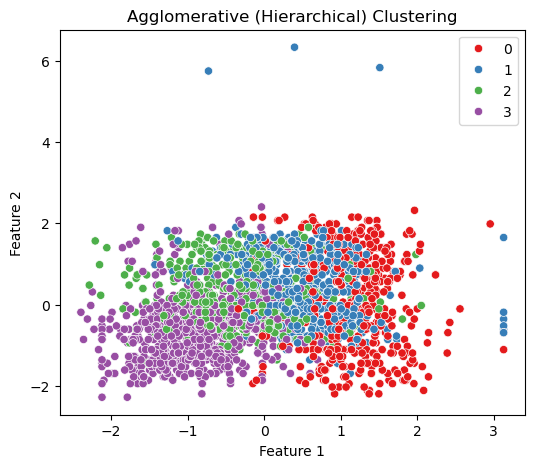

In [47]:
# Visualize clusters
plt.figure(figsize=(6,5))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=agg_labels, palette='Set1')
plt.title("Agglomerative (Hierarchical) Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [48]:
# Cluster Summary  (Agglomerative (Hierarchical) Clustering)

# Select numeric columns only
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# compute mean
cluster_summary = df.groupby('Agglo_Cluster')[num_cols].mean()

print("Cluster Summary ( Agglomerative (Hierarchical) Clustering):")
display(cluster_summary)

Cluster Summary ( Agglomerative (Hierarchical) Clustering):


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,Complain,Z_CostContact,Z_Revenue,Response,Age,TotalChildren,TotalSpend,IsPartner,FamilySize,Agglo_Cluster
Agglo_Cluster,,,,,,,,,,,,,,,,,,,,,
0,5676.029350,1968.182390,2.444444,3.802935,76390.284067,0.000000,0.000000,49.823899,627.664570,64.268344,...,0.006289,3.0,11.0,0.318658,56.817610,0.000000,1407.438155,0.595388,1.595388,0.0
1,5536.204947,1963.084806,2.551237,3.719081,61565.175795,0.072438,0.929329,47.779152,481.501767,31.871025,...,0.008834,3.0,11.0,0.095406,61.915194,1.001767,815.862191,0.655477,2.657244,1.0
2,5584.976645,1965.280255,2.515924,3.711253,44447.987261,1.036093,1.070064,50.186837,139.464968,7.528662,...,0.014862,3.0,11.0,0.101911,59.719745,2.106157,239.838641,0.666667,3.772824,2.0
3,5585.338843,1975.962810,2.158402,3.702479,33003.446281,0.641873,0.143251,48.977961,59.506887,9.195592,...,0.008264,3.0,11.0,0.110193,49.037190,0.785124,152.752066,0.654270,2.439394,3.0


## ----------- DBSCAN Clustering -------------

In [49]:
#  DBSCAN Clustering

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=1.5, min_samples=5)
db_labels = dbscan.fit_predict(X_scaled)

In [50]:
# Add cluster labels to DataFrame
df['DBSCAN_Cluster'] = db_labels

In [51]:
# Check number of clusters (DBSCAN may mark some points as noise = -1)
unique_labels = np.unique(db_labels)
print("DBSCAN unique labels:", unique_labels)
print("Number of clusters (excluding noise):", len(unique_labels[unique_labels != -1]))

DBSCAN unique labels: [-1  0]
Number of clusters (excluding noise): 1


In [52]:
# Evaluate clustering quality (only if more than 1 cluster found)
if len(set(db_labels)) > 1:
    sil_score = silhouette_score(X_scaled, db_labels)
    print("DBSCAN Silhouette Score:", sil_score)
else:
    print("Silhouette Score not applicable (only one cluster found).")

DBSCAN Silhouette Score: 0.3545765966144258


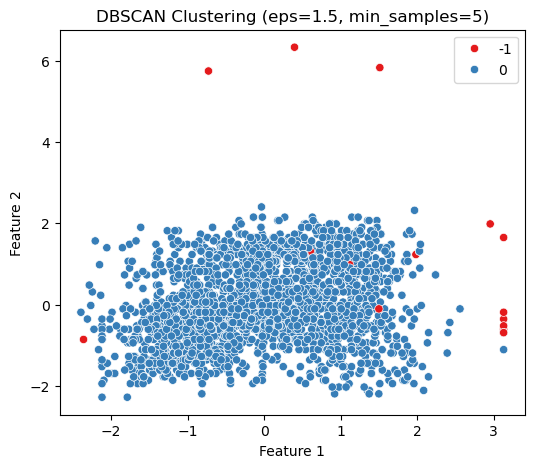

In [53]:
# Visualize DBSCAN clusters
plt.figure(figsize=(6,5))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=db_labels, palette='Set1')
plt.title("DBSCAN Clustering (eps=1.5, min_samples=5)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [54]:
# Cluster Summary  (DBSCAN  Clustering)

# Select numeric columns only
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# compute mean
cluster_summary = df.groupby('DBSCAN_Cluster')[num_cols].mean()

print("Cluster Summary ( DBSCAN Clustering):")
display(cluster_summary)

Cluster Summary ( DBSCAN Clustering):


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,Z_CostContact,Z_Revenue,Response,Age,TotalChildren,TotalSpend,IsPartner,FamilySize,Agglo_Cluster,DBSCAN_Cluster
DBSCAN_Cluster,,,,,,,,,,,,,,,,,,,,,
-1,5901.875000,1952.562500,2.687500,3.812500,87021.906250,0.625000,0.812500,59.750000,326.750000,23.812500,...,3.0,11.0,0.06250,72.437500,1.437500,793.750000,0.687500,3.125000,1.375000,-1.0
0,5589.931655,1968.922662,2.391637,3.729317,51612.953462,0.442896,0.504047,49.032824,303.771583,26.320144,...,3.0,11.0,0.14973,56.077338,0.946942,604.446043,0.644335,2.591277,1.647482,0.0


## ----------- Gaussian Mixture Model (GMM) ----------------

In [55]:
#  Gaussian Mixture Model (GMM)

# Import required library
from sklearn.mixture import GaussianMixture

In [56]:
# Create and fit the GMM model
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

In [57]:
# Add GMM cluster labels to DataFrame
df['GMM_Cluster'] = gmm_labels

In [58]:
# Evaluate model using silhouette score
sil_score = silhouette_score(X_scaled, gmm_labels)
print("Gaussian Mixture Model Silhouette Score:", sil_score)

Gaussian Mixture Model Silhouette Score: 0.1578706983850391


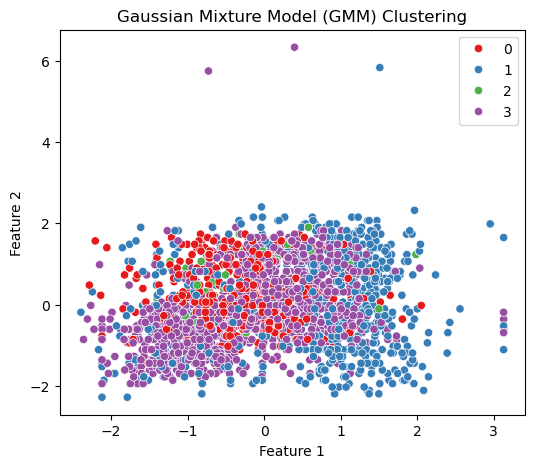

In [59]:
# Visualize GMM clusters
plt.figure(figsize=(6,5))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=gmm_labels, palette='Set1')
plt.title("Gaussian Mixture Model (GMM) Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [60]:
# Cluster Summary  ( Gaussian Mixture Model (GMM))

# Select numeric columns only
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

#compute mean
cluster_summary = df.groupby('GMM_Cluster')[num_cols].mean()

print("Cluster Summary (  Gaussian Mixture Model (GMM)):")
display(cluster_summary)

Cluster Summary (  Gaussian Mixture Model (GMM)):


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,Z_Revenue,Response,Age,TotalChildren,TotalSpend,IsPartner,FamilySize,Agglo_Cluster,DBSCAN_Cluster,GMM_Cluster
GMM_Cluster,,,,,,,,,,,,,,,,,,,,,
0,5592.095012,1965.707838,2.498812,3.700713,44585.861639,0.969121,1.030879,49.334917,141.591449,7.878860,...,11.0,0.111639,59.292162,2.0,245.947743,0.665083,3.665083,1.995249,-0.002375,0.0
1,5589.625392,1968.583072,2.352665,3.771160,65343.884796,0.000000,0.000000,49.086207,487.305643,52.357367,...,11.0,0.264890,56.416928,0.0,1106.029781,0.601881,1.601881,0.747649,-0.006270,1.0
2,5569.641509,1962.603774,2.679245,3.773585,46943.292453,1.584906,1.415094,56.377358,171.377358,6.905660,...,11.0,0.037736,62.396226,3.0,274.603774,0.603774,4.603774,2.000000,-0.094340,2.0
3,5594.675532,1970.379433,2.364362,3.715426,47191.062278,0.445922,0.554078,48.696809,267.040780,19.352837,...,11.0,0.102837,54.620567,1.0,472.733156,0.663121,2.663121,2.006206,-0.005319,3.0


## --------------- MiniBatch KMeans ---------------

In [61]:
#  MiniBatch KMeans (Optional for Large Datasets)

# Create and fit MiniBatch KMeans model
mini_kmeans = MiniBatchKMeans(n_clusters=4, random_state=42, batch_size=100)
mini_labels = mini_kmeans.fit_predict(X_scaled)


In [62]:
# Add cluster labels to DataFrame
df['MiniBatchKMeans_Cluster'] = mini_labels


In [63]:
# Evaluate clustering quality
sil_score = silhouette_score(X_scaled, mini_labels)
print("MiniBatch KMeans Silhouette Score:", sil_score)



MiniBatch KMeans Silhouette Score: 0.21193530951695203


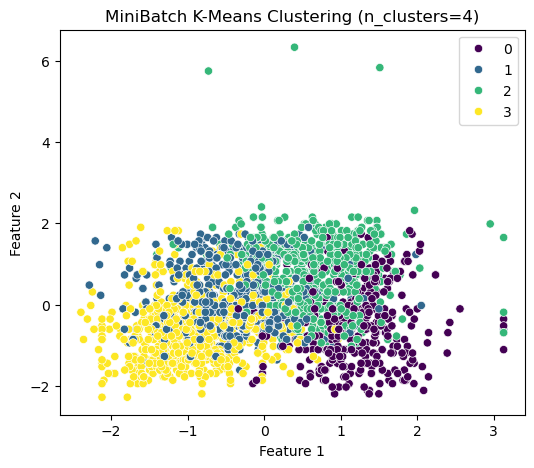

In [64]:
# Visualize clusters
plt.figure(figsize=(6,5))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=mini_labels, palette='viridis')
plt.title("MiniBatch K-Means Clustering (n_clusters=4)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [65]:
# Cluster Summary  (MiniBatchKMeans Clustering)

# Select numeric columns only
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Group by KMeans cluster and compute mean
cluster_summary = df.groupby('MiniBatchKMeans_Cluster')[num_cols].mean()

print("Cluster Summary (MiniBatchKMeans Clustering:")
display(cluster_summary)

Cluster Summary (MiniBatchKMeans Clustering:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,Z_Revenue,Response,Age,TotalChildren,TotalSpend,IsPartner,FamilySize,Agglo_Cluster,DBSCAN_Cluster,GMM_Cluster
MiniBatchKMeans_Cluster,,,,,,,,,,,,,,,,,,,,,
0,5573.701897,1974.691057,2.439024,3.718157,77588.845528,0.032520,0.046070,49.279133,674.208672,68.341463,...,11.0,0.349593,50.308943,0.078591,1500.710027,0.547425,1.626016,0.086721,-0.005420,1.157182
1,5504.426573,1966.220280,2.501748,3.763986,43930.443619,0.930070,0.966783,56.709790,130.931818,6.753497,...,11.0,0.083916,58.779720,1.896853,224.921329,0.739510,3.636364,2.097902,-0.010490,0.772727
2,5647.274959,1959.556465,2.512275,3.734861,64993.342471,0.045827,0.684124,52.135843,509.772504,38.397709,...,11.0,0.121113,65.443535,0.729951,920.957447,0.648118,2.378069,0.921440,-0.011457,2.394435
3,5626.053779,1976.013081,2.174419,3.703488,33008.908430,0.614826,0.212209,40.011628,66.379360,9.265988,...,11.0,0.120640,48.986919,0.827035,162.595930,0.614826,2.441860,2.748547,-0.001453,2.610465


# Compare Clustering Algorithms visually

In [66]:
#  Visual Comparison of Clusters
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [67]:
models = {
    'KMeans': kmeans_labels,
    'Agglomerative': agg_labels,
    'DBSCAN': db_labels,
    'GMM': gmm_labels,
    'MiniBatchKMeans': mini_labels
}


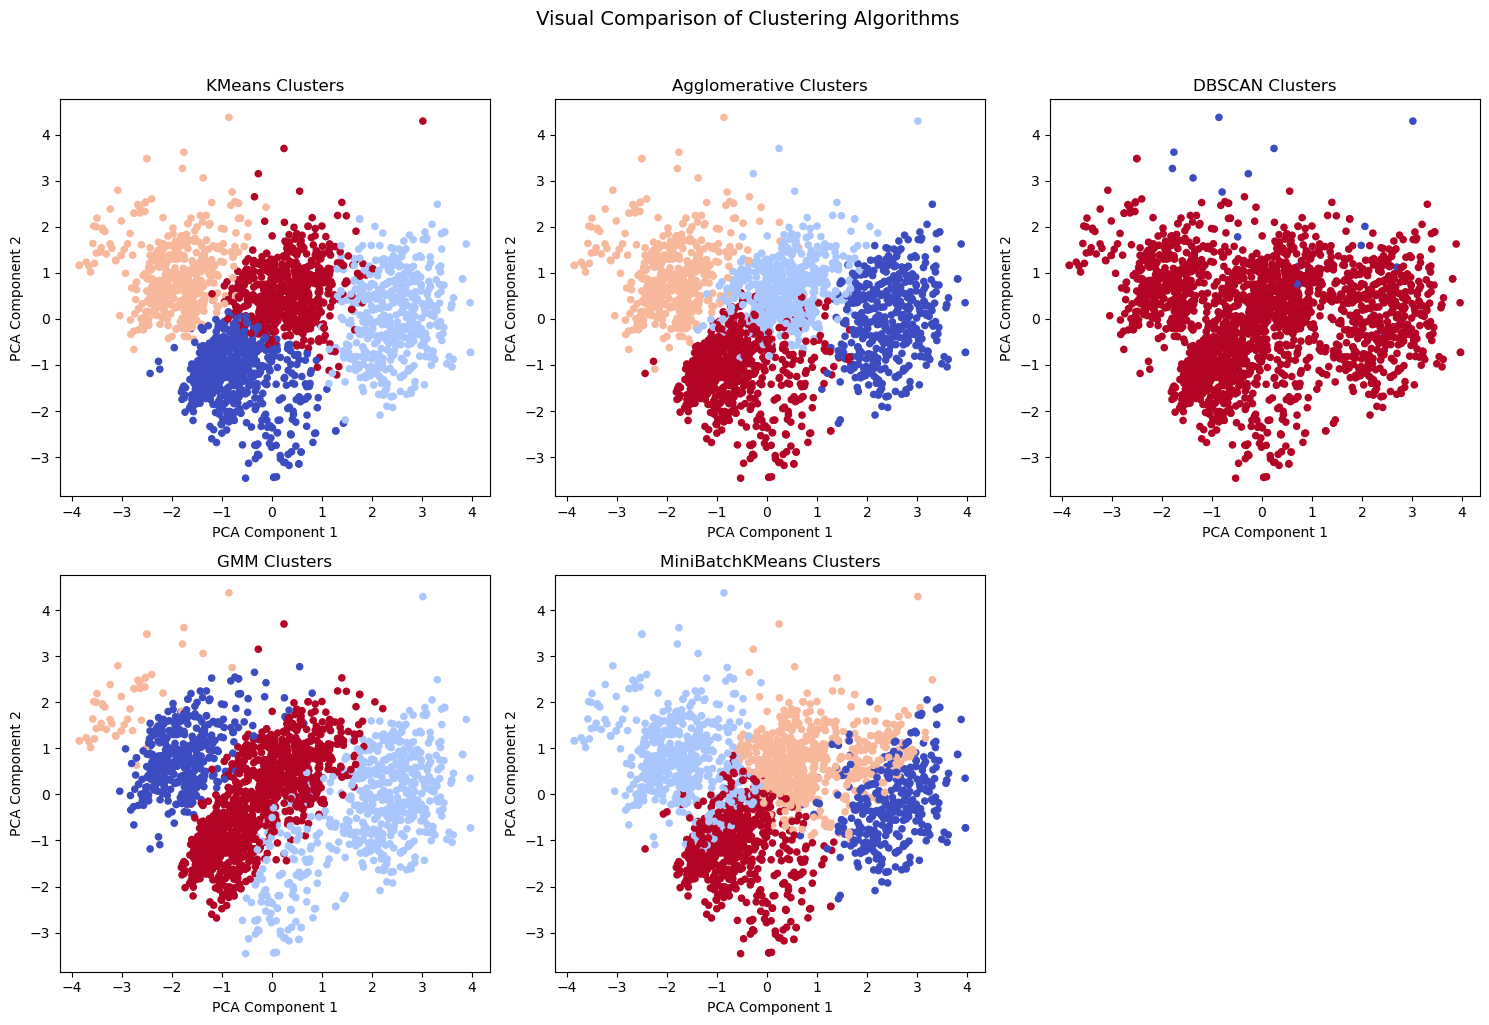

In [68]:
# Plot clusters for each model side by side
plt.figure(figsize=(15, 10))
for i, (name, labels) in enumerate(models.items(), 1):
    plt.subplot(2, 3, i)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='coolwarm', s=20)
    plt.title(f"{name} Clusters")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")

plt.suptitle(" Visual Comparison of Clustering Algorithms", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()


#  Compare Clustering Algorithms

In [69]:
#  Compare Clustering Algorithms

# Dictionary of model labels
models = {
    'KMeans': kmeans_labels,
    'Agglomerative': agg_labels,
    'DBSCAN': db_labels,
    'GMM': gmm_labels,
    'MiniBatchKMeans': mini_labels
}

comparison = []

# Calculate metrics for each model
for name, labels in models.items():
    if len(set(labels)) > 1:
        sil = silhouette_score(X_scaled, labels)
        dbi = davies_bouldin_score(X_scaled, labels)
        chi = calinski_harabasz_score(X_scaled, labels)
        comparison.append([name, sil, dbi, chi])


In [70]:
# Create comparison dataframe
comparison_df = pd.DataFrame(
    comparison,
    columns=['Model', 'Silhouette', 'Davies-Bouldin', 'Calinski-Harabasz']
)

In [71]:
# Print raw comparison
print("Clustering Performance Comparison:")
print(comparison_df)

Clustering Performance Comparison:
             Model  Silhouette  Davies-Bouldin  Calinski-Harabasz
0           KMeans    0.238120        1.500809         771.065905
1    Agglomerative    0.229845        1.525626         734.159920
2           DBSCAN    0.354577        2.569263          15.272652
3              GMM    0.157871        1.806847         435.983432
4  MiniBatchKMeans    0.211935        1.553719         712.786333


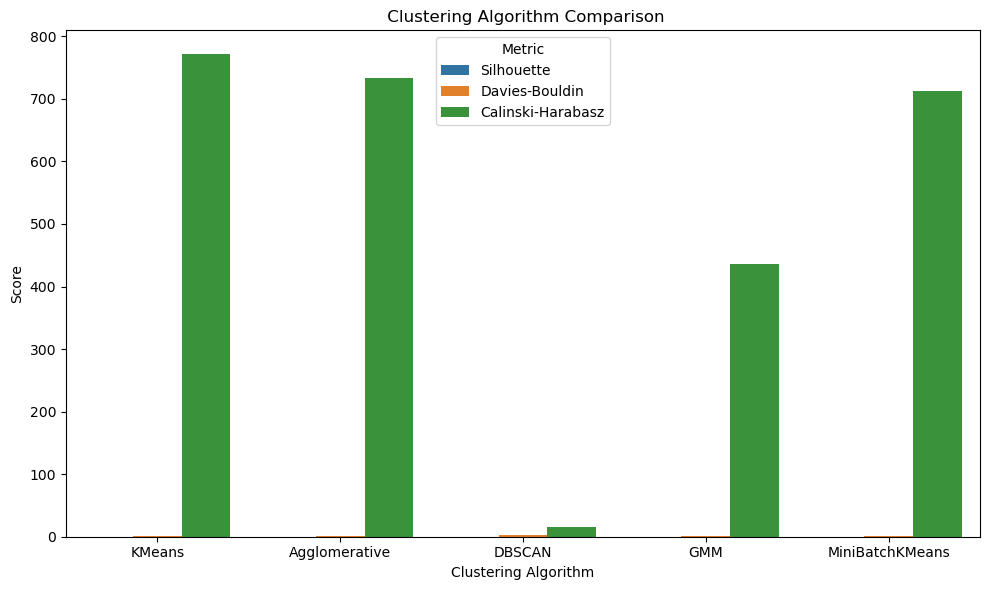

In [72]:
# Visualization of comparison

plt.figure(figsize=(10,6))
plt.title(" Clustering Algorithm Comparison")
sns.barplot(
    data=comparison_df.melt(id_vars='Model', var_name='Metric', value_name='Score'),
    x='Model', y='Score', hue='Metric'
)
plt.xlabel("Clustering Algorithm")
plt.ylabel("Score")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

# Find the best clustering model

In [73]:
if 'comparison_df' in globals():
    compare_df = comparison_df.copy()
elif 'compare_df' in globals():
    compare_df = compare_df.copy()
else:
    raise ValueError("comparison_df not found. Please ensure you ran the comparison section first.")
if "Overall_Score" not in compare_df.columns:
    compare_df["Overall_Score"] = (
        compare_df["Silhouette"].rank(pct=True) +
        compare_df["Calinski-Harabasz"].rank(pct=True) +
        (1 - compare_df["Davies-Bouldin"].rank(pct=True))
    ) / 3

In [74]:
# Identify the best model based on Overall_Score
best_model = compare_df.loc[compare_df["Overall_Score"].idxmax()]

In [75]:
# Print Best Model
print("\n Best Model Selected:")
print(f"→ {best_model['Model']} (Overall Score: {best_model['Overall_Score']:.3f})")


 Best Model Selected:
→ KMeans (Overall Score: 0.867)


In [76]:
# Visualize the Best Model
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

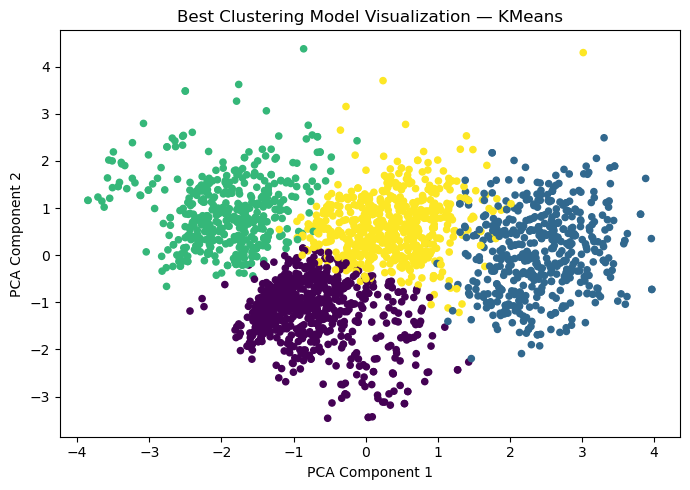

In [77]:
plt.figure(figsize=(7,5))
best_name = best_model["Model"]
best_labels = models[best_name]
plt.scatter(X_pca[:,0], X_pca[:,1], c=best_labels, cmap='viridis', s=20)
plt.title(f"Best Clustering Model Visualization — {best_name}")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.tight_layout()
plt.show()

In [78]:
import pickle

In [79]:
# Saving trained K-Means model
with open("kmeans_model.pkl", "wb") as f:
    pickle.dump(kmeans, f)

# Saving scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("Model and scaler saved successfully!")

Model and scaler saved successfully!
